In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

In [23]:
folder_path  = '/kaggle/input/utkface-new/UTKFace'

In [24]:
age = [ ]
gender = [ ]
img_path = [ ]


for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)





In [25]:
len(age)

23708

In [28]:
df = pd.DataFrame({'age' : age, 'gender' : gender, 'img' : img_path})
df.shape

(23708, 3)

In [29]:
df.head()

,age,gender,img
0,24,0,24_0_1_20170116000638538.jpg.chip.jpg
1,60,0,60_0_0_20170117001131850.jpg.chip.jpg
2,24,0,24_0_1_20170113134107281.jpg.chip.jpg
3,4,1,4_1_0_20170109193059401.jpg.chip.jpg
4,56,1,56_1_0_20170110154644528.jpg.chip.jpg


In [31]:
train_df = df.sample(frac=1, random_state=0).iloc[:20000]
test_df = df.sample (frac=1, random_state=0).iloc[20000 :]

In [32]:
print(train_df.shape)
print(test_df.shape)

(20000, 3)

(3708, 3)


In [33]:
train_datagen = ImageDataGenerator (rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col= 'img',
                                                    y_col=['age', 'gender'],
                                                    target_size=(200,200),
                                                    class_mode= 'multi_output' )

test_generator = test_datagen. flow_from_dataframe(test_df,
                                                   directory=folder_path,
                                                   x_col='img',
                                                   y_col=['age', 'gender'],
                                                   target_size=(200,200),
                                                   class_mode= 'multi_output')

Found 20000 validated image filenames.

Found 3708 validated image filenames.


In [35]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [36]:
vggnet = VGG16(include_top=False, input_shape=(200,200,3))


58889256/58889256 [==============================] - 0s 0us/step


In [41]:
vggnet.trainable=False
output = vggnet. layers[-1]. output
flatten = Flatten() (output)

dense1 = Dense(512, activation='relu') (flatten)
dense2 = Dense (512, activation='relu') (flatten)

dense3 = Dense (512, activation='relu' )(dense1)
dense4 = Dense(512, activation='relu') (dense2)

output1 = Dense(1, activation='linear', name= 'age' ) (dense3)
output2 = Dense(1, activation='sigmoid', name= 'gender') (dense4)

In [42]:
model = Model (inputs=vggnet.input, outputs=[output1, output2])

In [43]:
model.summary()

Model: "model"

__________________________________________________________________________________________________

 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            

                                                                                                  

 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_1[0][0]']             

                                                                                                  

 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        

                                                                                                  

 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        

                                                                                   

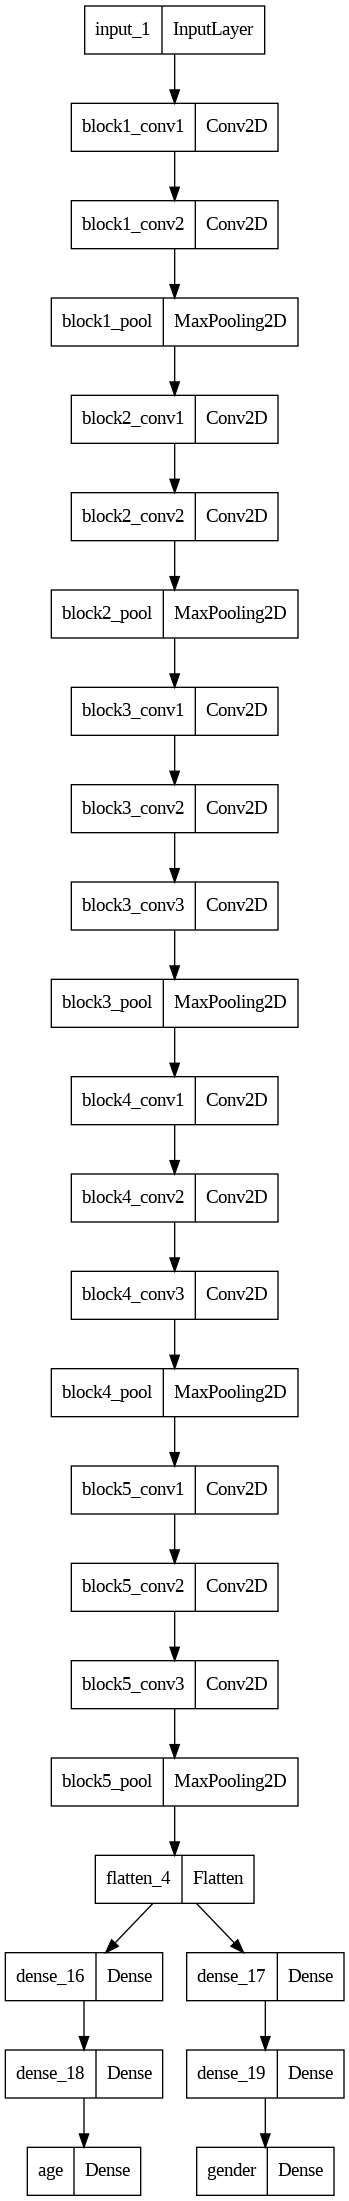

In [44]:
from keras.utils import plot_model
plot_model(model)

In [49]:
model.compile(optimizer = 'adam',loss = {'age' : 'mae', 'gender' : 'binary_crossentropy'}, metrics = {'age' : 'mae', 'gender' : 'accuracy'}, loss_weights = {'age' :1, 'gender':99})


In [51]:
model.fit(train_generator, batch_size=32, epochs=10, validation_data = test_generator)

Epoch 1/10

625/625 [==============================] - 262s 402ms/step - loss: 62.9241 - age_loss: 10.8443 - gender_loss: 0.5261 - age_mae: 10.8443 - gender_accuracy: 0.7413 - val_loss: 45.4206 - val_age_loss: 8.4091 - val_gender_loss: 0.3739 - val_age_mae: 8.4091 - val_gender_accuracy: 0.8279

Epoch 2/10

625/625 [==============================] - 252s 403ms/step - loss: 54.0960 - age_loss: 9.3710 - gender_loss: 0.4518 - age_mae: 9.3710 - gender_accuracy: 0.7796 - val_loss: 45.4879 - val_age_loss: 8.5032 - val_gender_loss: 0.3736 - val_age_mae: 8.5032 - val_gender_accuracy: 0.8317

Epoch 3/10

625/625 [==============================] - 243s 389ms/step - loss: 50.7676 - age_loss: 9.0182 - gender_loss: 0.4217 - age_mae: 9.0182 - gender_accuracy: 0.8005 - val_loss: 41.1705 - val_age_loss: 7.9651 - val_gender_loss: 0.3354 - val_age_mae: 7.9651 - val_gender_accuracy: 0.8519

Epoch 4/10

625/625 [==============================] - 242s 387ms/step - loss: 49.4178 - age_loss: 8.7785 - gender_l